In [646]:
import sys
assert sys.version_info >= (3,7) ,'too low version'

In [647]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [648]:
import numpy as np
np.random.permutation(10)

array([6, 0, 8, 1, 9, 7, 3, 5, 4, 2])

In [649]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [650]:
print(housing.head(20))
housing.describe()

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


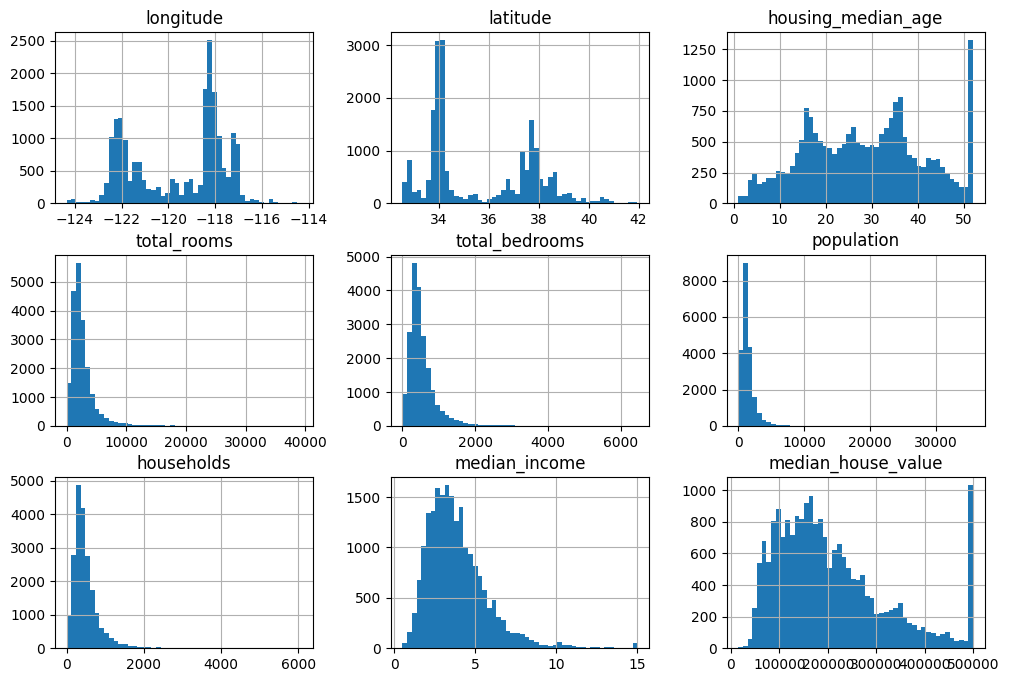

In [651]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))

plt.show()

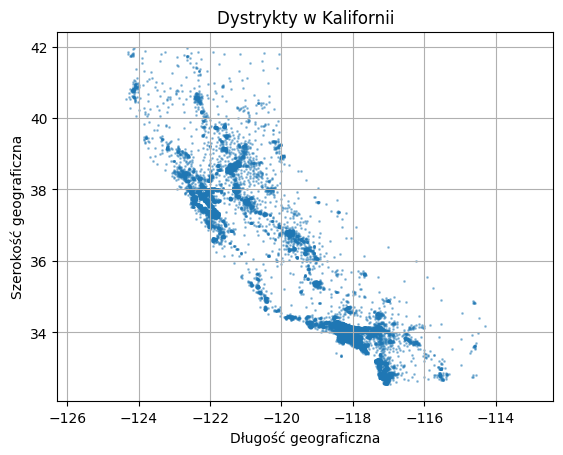

In [652]:
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4, s=1)
plt.xlabel('Długość geograficzna')
plt.ylabel('Szerokość geograficzna')
plt.title('Dystrykty w Kalifornii')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='datalim')  # Set an equal aspect ratio
plt.show()

In [653]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

C:\Users\Szymon\AppData\Local\Temp\ipykernel_11868\2352451982.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


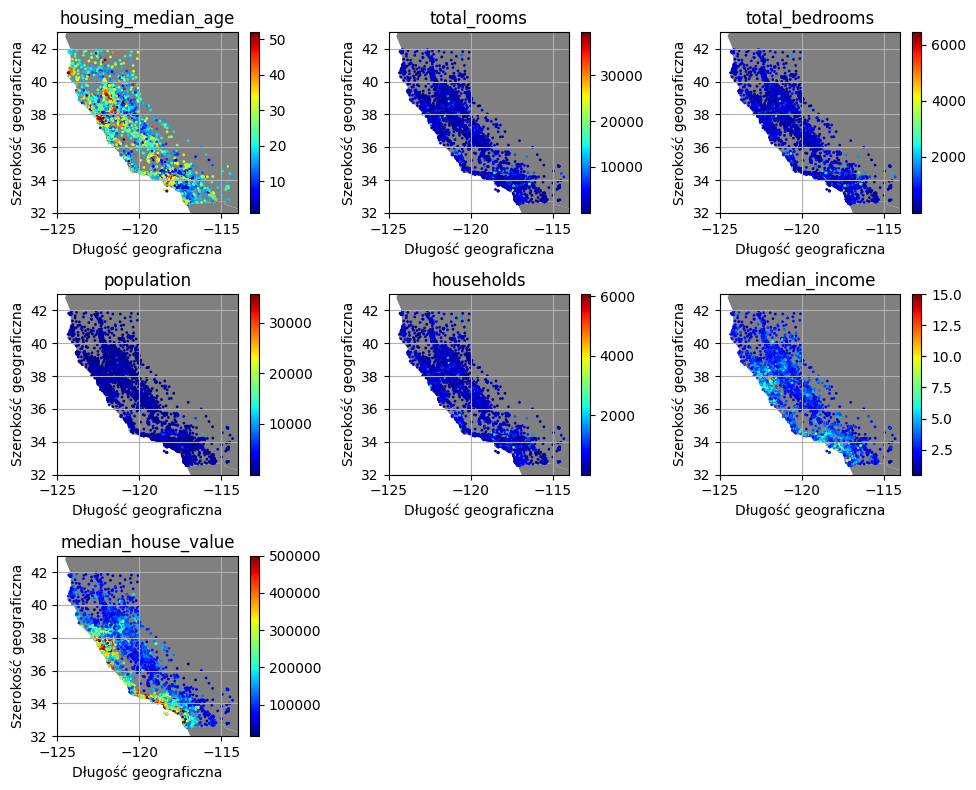

In [654]:
import matplotlib.colors as cl
floatscol = housing.select_dtypes(include=['float']).drop(['longitude','latitude'],axis=1)
columns = floatscol.columns
fig, axes = plt.subplots(nrows=(len(columns)/3).__ceil__(), ncols=3,figsize = (10, 8))
axes = axes.flatten()
for i, column in enumerate(columns):
    ax = axes[i]  # Przypisanie bieżącej osi z listy osi
    plt.sca(ax)
    countries.plot(color='grey', ax=ax)
    ax.axis([-125, -114, 32, 43])
    c = housing[column]
    norm = cl.Normalize(vmin=min(c), vmax=max(c))
    sc = ax.scatter(housing['longitude'], housing['latitude'], s=1, c=c, norm=norm, cmap='jet')
    plt.colorbar(mappable=sc, cmap='jet', ax=ax)  # Dodanie paska kolorów do bieżącej osi
    ax.set_xlabel('Długość geograficzna')
    ax.set_ylabel('Szerokość geograficzna')
    ax.set_title(column)
    ax.grid(True)

# Ukrycie pozostałych osi, jeśli liczba kolumn nie jest wielokrotnością 3
for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

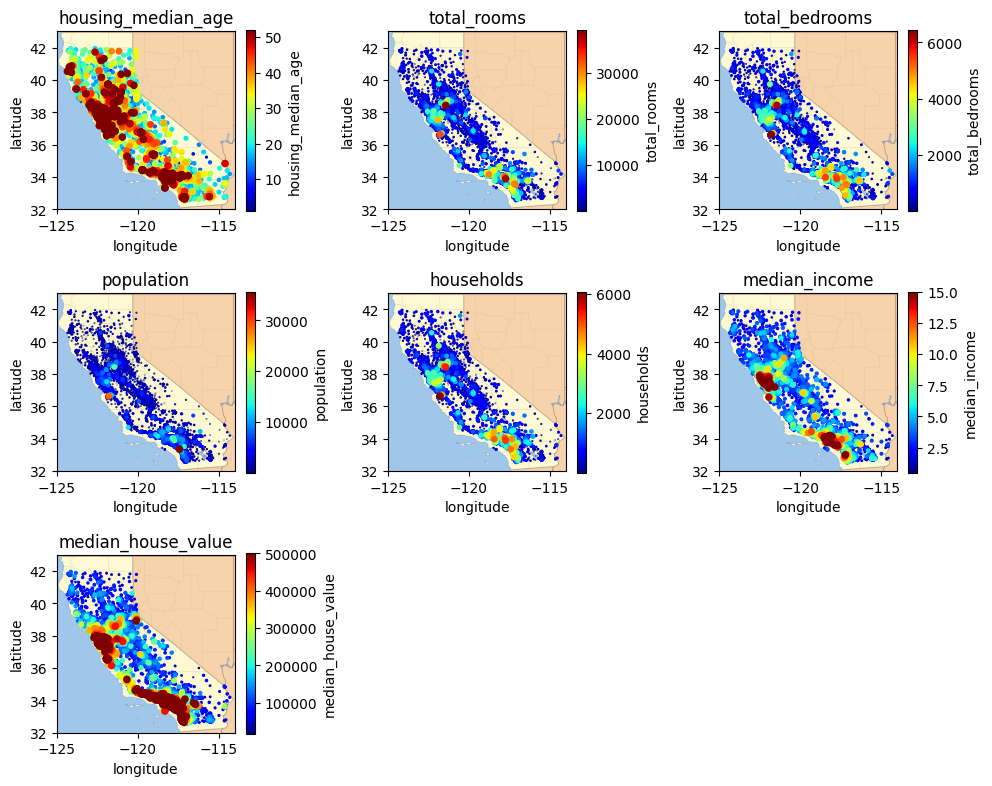

In [655]:
fig, axes = plt.subplots(nrows=(len(columns)/3).__ceil__(), ncols=3,figsize = (10, 8))
axes= axes.flatten()
cal = plt.imread('california.png')
for i, column in enumerate(columns):
    ax = axes[i]
    axis = [-125, -114, 32, 43]
    ax.axis(axis)
    ax.imshow(cal,extent=axis)
    housing.sort_values(by=column,inplace=True)
    norm = (housing[column] - min(housing[column])) / (max(housing[column]) - min(housing[column]))
    housing.plot(kind='scatter', x='longitude',y='latitude',c=column, colorbar=True, 
                 cmap='jet', title=column,ax=ax,s=norm * 20)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


(array([4.199e+03, 8.974e+03, 4.340e+03, 1.584e+03, 7.190e+02, 3.300e+02,
        1.890e+02, 9.100e+01, 5.600e+01, 4.500e+01, 5.000e+01, 1.300e+01,
        1.400e+01, 1.300e+01, 5.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([3.000000e+00, 7.165800e+02, 1.430160e+03, 2.143740e+03,
        2.857320e+03, 3.570900e+03, 4.284480e+03, 4.998060e+03,
        5.711640e+03, 6.425220e+03, 7.138800e+03, 7.852380e+03,
        8.565960e+03, 9.279540e+03, 9.993120e+03, 1.070670e+04,
        1.142028e+04, 1.213386e+04, 1.284744e+04, 1.356102e+04,
        1.427460e+04, 1.498818e+04, 1.570176e+04, 1.6415

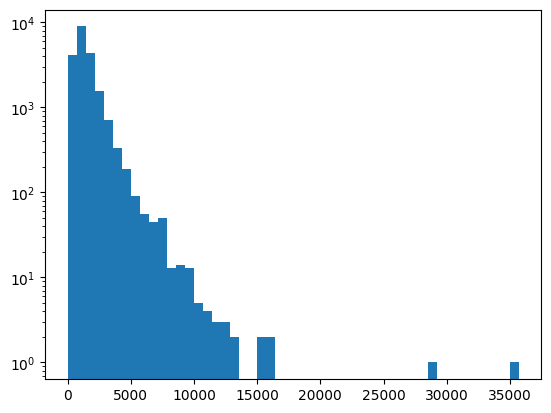

In [656]:
pop = housing
pop.sort_values(by='population',inplace=True,ascending=False)
plt.hist(x=pop['population'],bins=50,log=True)


(20000.0, 21000.0, 14.0, 16.0)

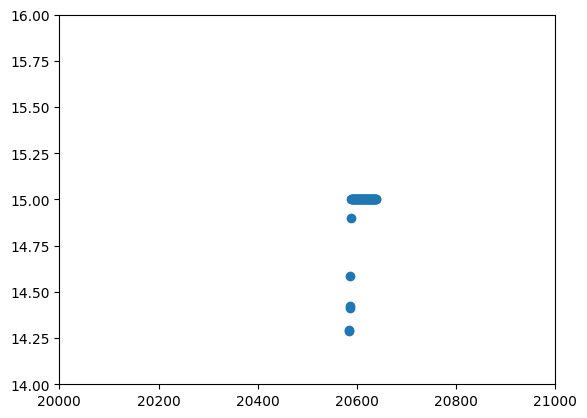

In [657]:
#housing.describe()
housing.sort_values(by='median_income',ascending=True,inplace=True,ignore_index=True)
plt.scatter(housing.index,housing['median_income'])
plt.axis([20000,21000,14,16])

In [658]:
def split_train_test(test_part, df):
    np.random.seed(42)
    idx = np.random.permutation(np.arange(len(df)))
    print(idx)
    test_idx = idx[:int(len(df) * test_part)]
    train_idx = idx[int(len(df) * test_part):]
    train_set = df.iloc[train_idx] 
    test_set = df.iloc[test_idx]
    return train_set, test_set


In [659]:
housing_train, housing_test = split_train_test(0.2,housing)

[20046  3024 15663 ...  5390   860 15795]


<Axes: xlabel='income_cat'>

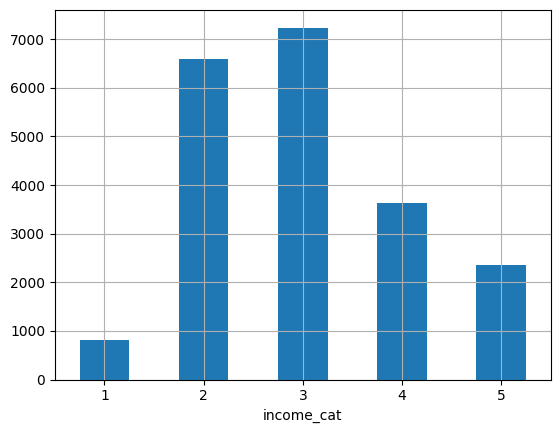

In [660]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=np.arange(1,6))
housing['income_cat'].value_counts().sort_index().plot.bar(grid=True,rot=0)

In [661]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


In [662]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [663]:
strat_train_set, strat_test_set = strat_splits[5]

In [664]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2,stratify=housing['income_cat'],random_state=42)

In [665]:
strat_test_set['income_cat'].value_counts().sort_index() / len(strat_test_set)

income_cat
1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: count, dtype: float64

In [666]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,3.68,0.36,-7.54
2,31.88,31.88,31.81,-0.02,-0.24
3,35.06,35.05,35.15,-0.01,0.26
4,17.63,17.64,17.97,0.03,1.95
5,11.44,11.43,11.39,-0.08,-0.51


In [667]:
overall = housing['income_cat'].value_counts().sort_index() / len(housing)

train, test = train_test_split(housing, test_size=0.2, random_state=42)
random = test['income_cat'].value_counts().sort_index() / len(test)

strat = strat_test_set['income_cat'].value_counts().sort_index() / len(strat_test_set)

comp_split = pd.DataFrame(data={'Overall %': overall, 'Random %': random, 'Strat %':strat
                                ,'rnd dif': abs(overall - random), 'strat dif': abs(overall - strat)})
comp_split = (comp_split * 100).round(2)
comp_split

,Overall %,Random %,Strat %,rnd dif,strat dif
income_cat,,,,,
1,3.98,3.68,4.00,0.30,0.01
2,31.88,31.81,31.88,0.08,0.00
3,35.06,35.15,35.05,0.09,0.00
4,17.63,17.97,17.64,0.34,0.00
5,11.44,11.39,11.43,0.06,0.01


In [668]:
housing.drop(labels=['income_cat'],axis=1,inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.75,34.06,52.0,62.0,9.0,44.0,16.0,0.4999,112500.0,INLAND
1,-121.01,37.65,52.0,178.0,53.0,152.0,62.0,0.4999,82500.0,INLAND
2,-118.28,33.93,52.0,117.0,33.0,74.0,45.0,0.4999,90600.0,<1H OCEAN
3,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,55000.0,INLAND
4,-118.08,34.15,28.0,238.0,58.0,142.0,31.0,0.4999,500001.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20635,-122.36,37.56,32.0,4684.0,540.0,1512.0,511.0,15.0001,500001.0,NEAR OCEAN
20636,-122.20,37.44,31.0,2328.0,270.0,722.0,247.0,15.0001,500001.0,NEAR OCEAN
20637,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,<1H OCEAN
20638,-118.20,34.19,38.0,2176.0,266.0,798.0,243.0,15.0001,500001.0,<1H OCEAN


In [669]:
corr_matrix = housing.drop(labels=['ocean_proximity'],axis=1).corr()

In [670]:
med_val_corr= corr_matrix['median_house_value'].sort_values(ascending=False)

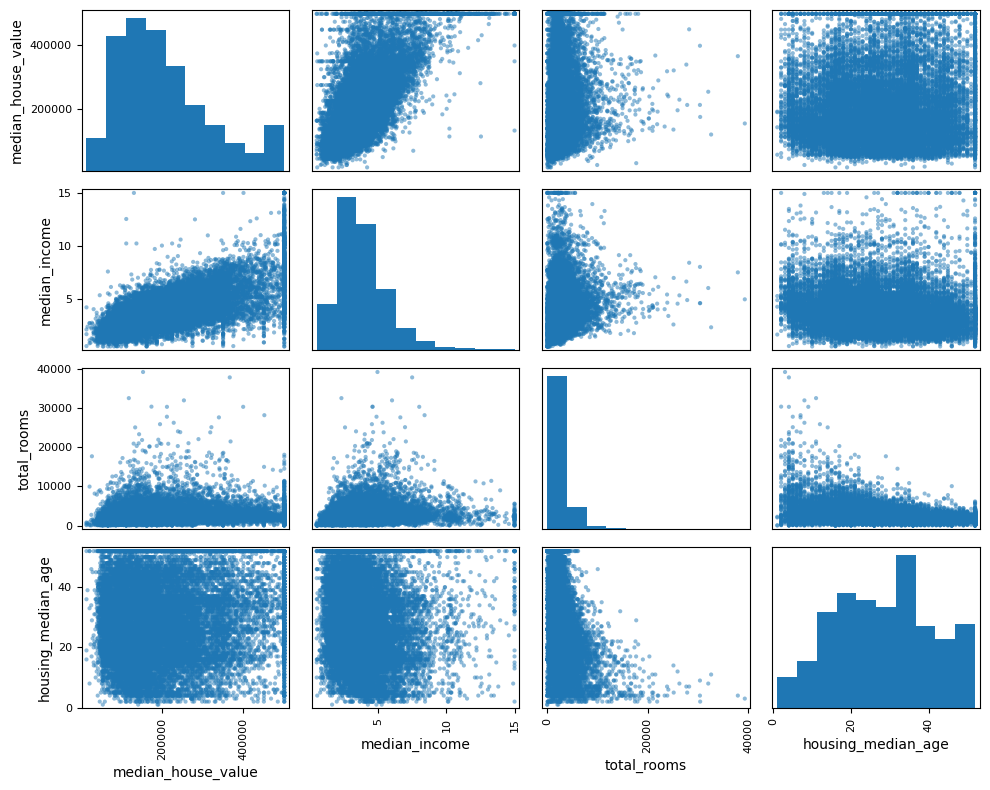

In [671]:
from pandas.plotting import scatter_matrix
atributes = med_val_corr.index[:4]
scatter_matrix(housing[atributes], figsize=(10,8))
plt.tight_layout()
plt.show()

In [672]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,grid=True)

In [ ]:
def delete_repetitions(df: pd.DataFrame, col: str, min_rep: int):
    df.sort_values(by=col, inplace=True)
    #df.reset_index(inplace=True)
    print(df)
    rep_count = 1 
    prev = df[col].iloc[0]  
    index_to_drop = []
    for i, value in df[col].items(): 
        if value == prev:
            rep_count += 1
        else:
            if rep_count > min_rep:
                index_to_drop.extend(df.index[i-rep_count:i])  
            rep_count = 1 
        prev = value

    if rep_count > min_rep:
        index_to_drop.extend(df.index[len(df)-rep_count:len(df)])
    print(len(index_to_drop))
    df = df.drop(index=index_to_drop)  
    return df

housing = delete_repetitions(housing, 'median_house_value', 20)


       level_0  index  longitude  latitude  housing_median_age  total_rooms  \
0            0   2858    -117.02     36.40                19.0        619.0   
1            1     19    -123.17     40.31                36.0         98.0   
2            2  13515    -117.86     34.24                52.0        803.0   
3            3   1241    -122.74     39.71                16.0        255.0   
4            4   4194    -118.33     34.15                39.0        493.0   
...        ...    ...        ...       ...                 ...          ...   
17685    19643  20420    -117.99     33.95                30.0       2217.0   
17686    19644  19587    -118.31     34.13                40.0       2822.0   
17687    19645  20051    -122.06     37.33                29.0       1945.0   
17688    19646  20012    -122.18     37.89                18.0       4845.0   
17689    19647  19274    -117.77     33.55                28.0       2024.0   

       total_bedrooms  population  households  medi

<Axes: xlabel='median_income', ylabel='median_house_value'>

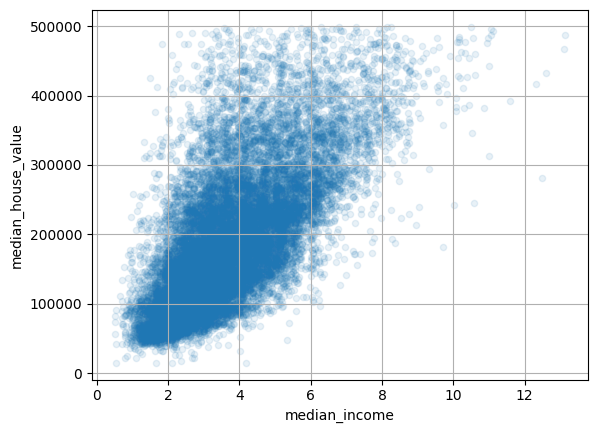

In [ ]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,grid=True)

In [ ]:
housing['rooms_per_famillyN'] = housing['total_rooms'] / housing['households']
housing['bedrooms_factorN'] = 1 / (housing['total_bedrooms'] / housing['total_rooms'])
housing['fam_pop_factorN'] = 1 / (housing['population'] / housing['households'])
housing.drop(labels=['index','level_0'],inplace=True,axis=1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_familly,bedrooms_factor,fam_pop_factor,rooms_per_famillyN,bedrooms_factorN,fam_pop_factorN
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND,3.568889,3.007491,0.358280,3.568889,3.007491,0.358280
3,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND,6.710526,3.493151,0.447059,6.710526,3.493151,0.447059
1,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND,12.250000,3.500000,0.444444,12.250000,3.500000,0.444444
0,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND,3.774390,2.589958,0.334694,3.774390,2.589958,0.334694
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN,3.572464,2.934524,0.532819,3.572464,2.934524,0.532819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,-117.99,33.95,30.0,2217.0,284.0,851.0,291.0,10.4835,498600.0,<1H OCEAN,7.618557,7.806338,0.341951,7.618557,7.806338,0.341951
17686,-118.31,34.13,40.0,2822.0,443.0,907.0,414.0,7.2692,498700.0,<1H OCEAN,6.816425,6.370203,0.456450,6.816425,6.370203,0.456450
17687,-122.06,37.33,29.0,1945.0,269.0,826.0,275.0,8.2480,498800.0,<1H OCEAN,7.072727,7.230483,0.332930,7.072727,7.230483,0.332930
17688,-122.18,37.89,18.0,4845.0,735.0,1634.0,734.0,8.1489,499000.0,NEAR BAY,6.600817,6.591837,0.449204,6.600817,6.591837,0.449204


In [ ]:
correl_new = housing.drop(labels=['ocean_proximity'],axis=1).corr()
correl_new['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.680079
bedrooms_factor       0.361532
bedrooms_factorN      0.361532
fam_pop_factor        0.248219
fam_pop_factorN       0.248219
rooms_per_familly     0.153992
rooms_per_famillyN    0.153992
total_rooms           0.145302
households            0.089654
total_bedrooms        0.068873
housing_median_age    0.062399
population            0.007062
longitude            -0.045445
latitude             -0.155578
Name: median_house_value, dtype: float64